## Advertisement Effectiveness

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Advertising_Effectiveness.csv')

df.head()

,ID,County,Channel,Ad_Spend,Impressions,Clicks,Conversions,CTR,Conversion_Rate,Revenue,ROI
0,1,Kakamega,YouTube Ads,"Ksh1,319.58",16405,6655,423,40.57,6.36,"Ksh24,392.62",1748.51
1,2,Kisumu,Radio,"Ksh6,330.95",62278,8122,782,13.04,9.63,"Ksh81,854.85",1192.93
2,3,Nyeri,YouTube Ads,"Ksh47,358.64",30694,9380,149,30.56,1.59,"Ksh16,476.43",-65.21
3,4,Eldoret,Meta Ads,"Ksh25,451.29",38709,4936,734,12.75,14.87,"Ksh90,914.95",257.21
4,5,Kakamega,TV,"Ksh16,347.76",86440,4192,575,4.85,13.72,"Ksh60,201.72",268.26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   County           1000 non-null   object 
 2   Channel          1000 non-null   object 
 3   Ad_Spend         1000 non-null   object 
 4   Impressions      1000 non-null   int64  
 5   Clicks           1000 non-null   int64  
 6   Conversions      1000 non-null   int64  
 7   CTR              1000 non-null   float64
 8   Conversion_Rate  1000 non-null   float64
 9   Revenue          1000 non-null   object 
 10  ROI              1000 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [8]:
df['Ad_Spend'] = df['Ad_Spend'].str.replace('Ksh', '', regex=False)\
                                .str.replace(',', '', regex=False)\
                                .astype(float)
df['Revenue'] = df['Revenue'].str.replace('Ksh', '', regex=False)\
                              .str.replace(',', '', regex=False)\
                              .astype(float)

In [9]:
df.head()

,ID,County,Channel,Ad_Spend,Impressions,Clicks,Conversions,CTR,Conversion_Rate,Revenue,ROI
0,1,Kakamega,YouTube Ads,1319.58,16405,6655,423,40.57,6.36,24392.62,1748.51
1,2,Kisumu,Radio,6330.95,62278,8122,782,13.04,9.63,81854.85,1192.93
2,3,Nyeri,YouTube Ads,47358.64,30694,9380,149,30.56,1.59,16476.43,-65.21
3,4,Eldoret,Meta Ads,25451.29,38709,4936,734,12.75,14.87,90914.95,257.21
4,5,Kakamega,TV,16347.76,86440,4192,575,4.85,13.72,60201.72,268.26


In [6]:
df.isnull().sum()

ID                 0
County             0
Channel            0
Ad_Spend           0
Impressions        0
Clicks             0
Conversions        0
CTR                0
Conversion_Rate    0
Revenue            0
ROI                0
dtype: int64

In [10]:
df.describe()

,ID,Ad_Spend,Impressions,Clicks,Conversions,CTR,Conversion_Rate,Revenue,ROI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,25492.760680,49453.880000,5119.245000,505.469000,26.429740,20.788360,63566.751580,359.26043
std,288.819436,13649.530009,28393.694711,2868.712744,289.356161,65.385271,36.913421,44105.333906,830.08779
min,1.000000,1084.640000,1104.000000,113.000000,11.000000,0.130000,0.150000,941.960000,-97.57000
25%,250.750000,13934.950000,25705.750000,2600.500000,252.750000,5.292500,5.107500,29141.522500,10.21750
50%,500.500000,25220.395000,47628.500000,5183.500000,506.500000,10.320000,9.980000,54316.865000,129.63000
75%,750.250000,37037.385000,73626.000000,7603.500000,758.500000,21.070000,18.810000,91146.792500,386.44250
max,1000.000000,49986.740000,99993.000000,9990.000000,1000.000000,904.530000,384.440000,192613.960000,11264.42000


In [14]:
df['Calculated_ROI'] = ((df['Revenue'] - df['Ad_Spend']) / df['Ad_Spend']) * 100
print(df[['ROI', 'Calculated_ROI']].head())


       ROI  Calculated_ROI
0  1748.51     1748.513921
1  1192.93     1192.931551
2   -65.21      -65.209242
3   257.21      257.211560
4   268.26      268.256691


In [20]:
# Define the correlation data as a dictionary.
corr_data = {
    'Ad_Spend': [1.000000, -0.013473, -0.017726, -0.011604, 0.033188, -0.040151, -0.011850, -0.472759],
    'Impressions': [-0.013473, 1.000000, -0.000865, 0.028479, -0.428725, 0.032978, 0.052416, 0.038450],
    'Clicks': [-0.017726, -0.000865, 1.000000, -0.000748, 0.237369, -0.528169, 0.001658, 0.040459],
    'Conversions': [-0.011604, 0.028479, -0.000748, 1.000000, -0.013901, 0.288249, 0.820576, 0.305736],
    'CTR': [0.033188, -0.428725, 0.237369, -0.013901, 1.000000, -0.123301, 0.012516, -0.013315],
    'Conversion_Rate': [-0.040151, 0.032978, -0.528169, 0.288249, -0.123301, 1.000000, 0.260121, 0.104322],
    'Revenue': [-0.011850, 0.052416, 0.001658, 0.820576, 0.012516, 0.260121, 1.000000, 0.377883],
    'ROI': [-0.472759, 0.038450, 0.040459, 0.305736, -0.013315, 0.104322, 0.377883, 1.000000]
}

# Define the row index (which are also the column names in this symmetric correlation matrix)
rows = ['Ad_Spend', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate', 'Revenue', 'ROI']

# Create the DataFrame using the dictionary and row index.
corr_df = pd.DataFrame(corr_data, index=rows)

# Print the correlation matrix DataFrame.
print(corr_df)


                 Ad_Spend  Impressions    Clicks  Conversions       CTR  \
Ad_Spend         1.000000    -0.013473 -0.017726    -0.011604  0.033188   
Impressions     -0.013473     1.000000 -0.000865     0.028479 -0.428725   
Clicks          -0.017726    -0.000865  1.000000    -0.000748  0.237369   
Conversions     -0.011604     0.028479 -0.000748     1.000000 -0.013901   
CTR              0.033188    -0.428725  0.237369    -0.013901  1.000000   
Conversion_Rate -0.040151     0.032978 -0.528169     0.288249 -0.123301   
Revenue         -0.011850     0.052416  0.001658     0.820576  0.012516   
ROI             -0.472759     0.038450  0.040459     0.305736 -0.013315   

                 Conversion_Rate   Revenue       ROI  
Ad_Spend               -0.040151 -0.011850 -0.472759  
Impressions             0.032978  0.052416  0.038450  
Clicks                 -0.528169  0.001658  0.040459  
Conversions             0.288249  0.820576  0.305736  
CTR                    -0.123301  0.012516 -0.013

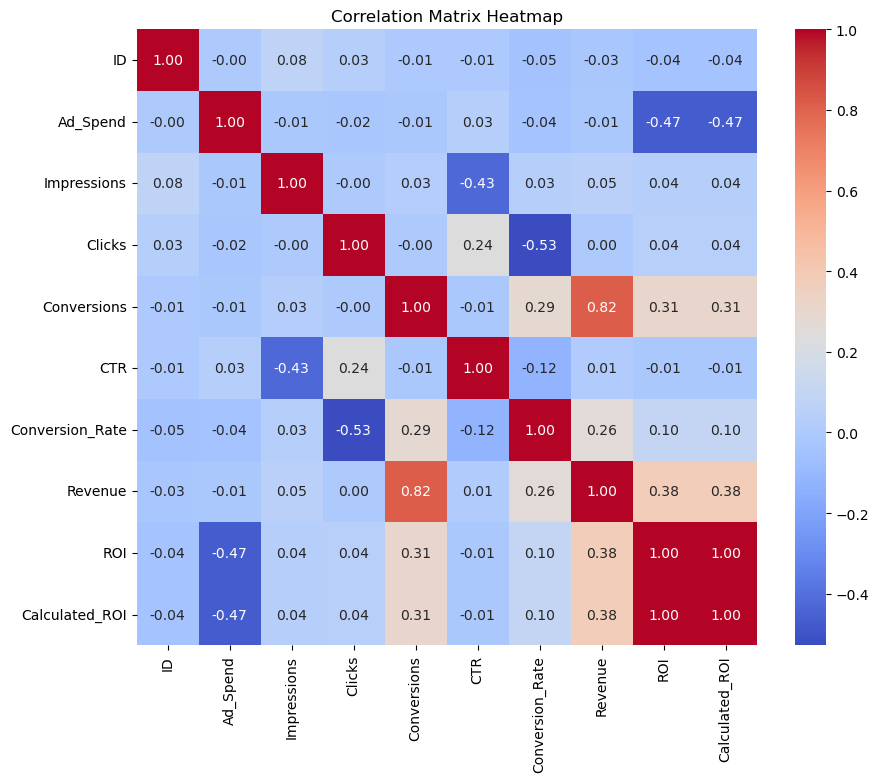

In [24]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix on these numeric columns
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


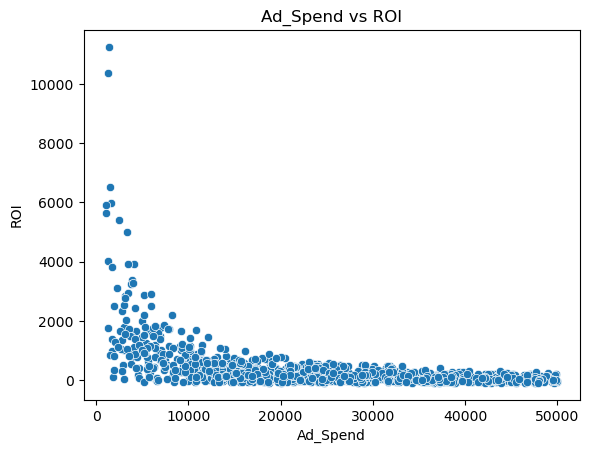

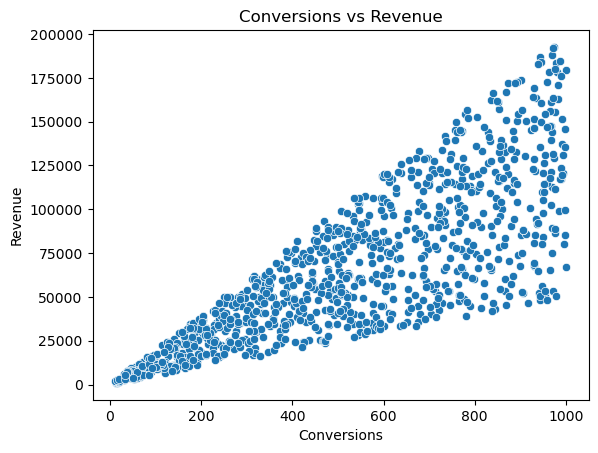

In [26]:
# Scatter plot for Ad_Spend vs. ROI
sns.scatterplot(x='Ad_Spend', y='ROI', data=df)
plt.title('Ad_Spend vs ROI')
plt.show()

# Scatter plot for Conversions vs Revenue
sns.scatterplot(x='Conversions', y='Revenue', data=df)
plt.title('Conversions vs Revenue')
plt.show()



       Channel         ROI
0   Billboards  263.731471
1     Meta Ads  360.585706
2    Newspaper  423.765663
3        Radio  329.097829
4           TV  373.358372
5  YouTube Ads  401.497175


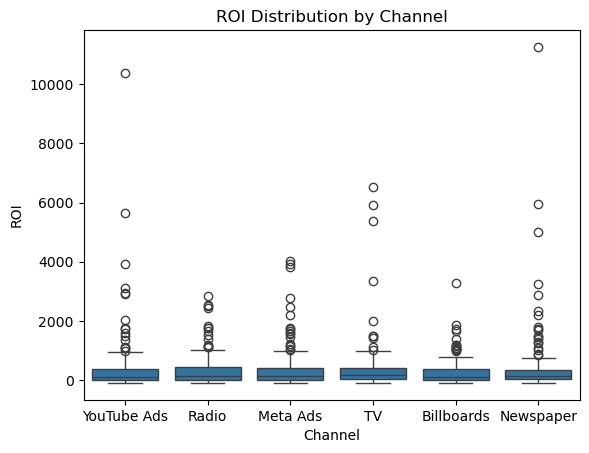

In [27]:
# Calculate mean ROI by Channel
channel_roi = df.groupby('Channel')['ROI'].mean().reset_index()
print(channel_roi)

# Or visualize ROI distribution by Channel
sns.boxplot(x='Channel', y='ROI', data=df)
plt.title('ROI Distribution by Channel')
plt.show()


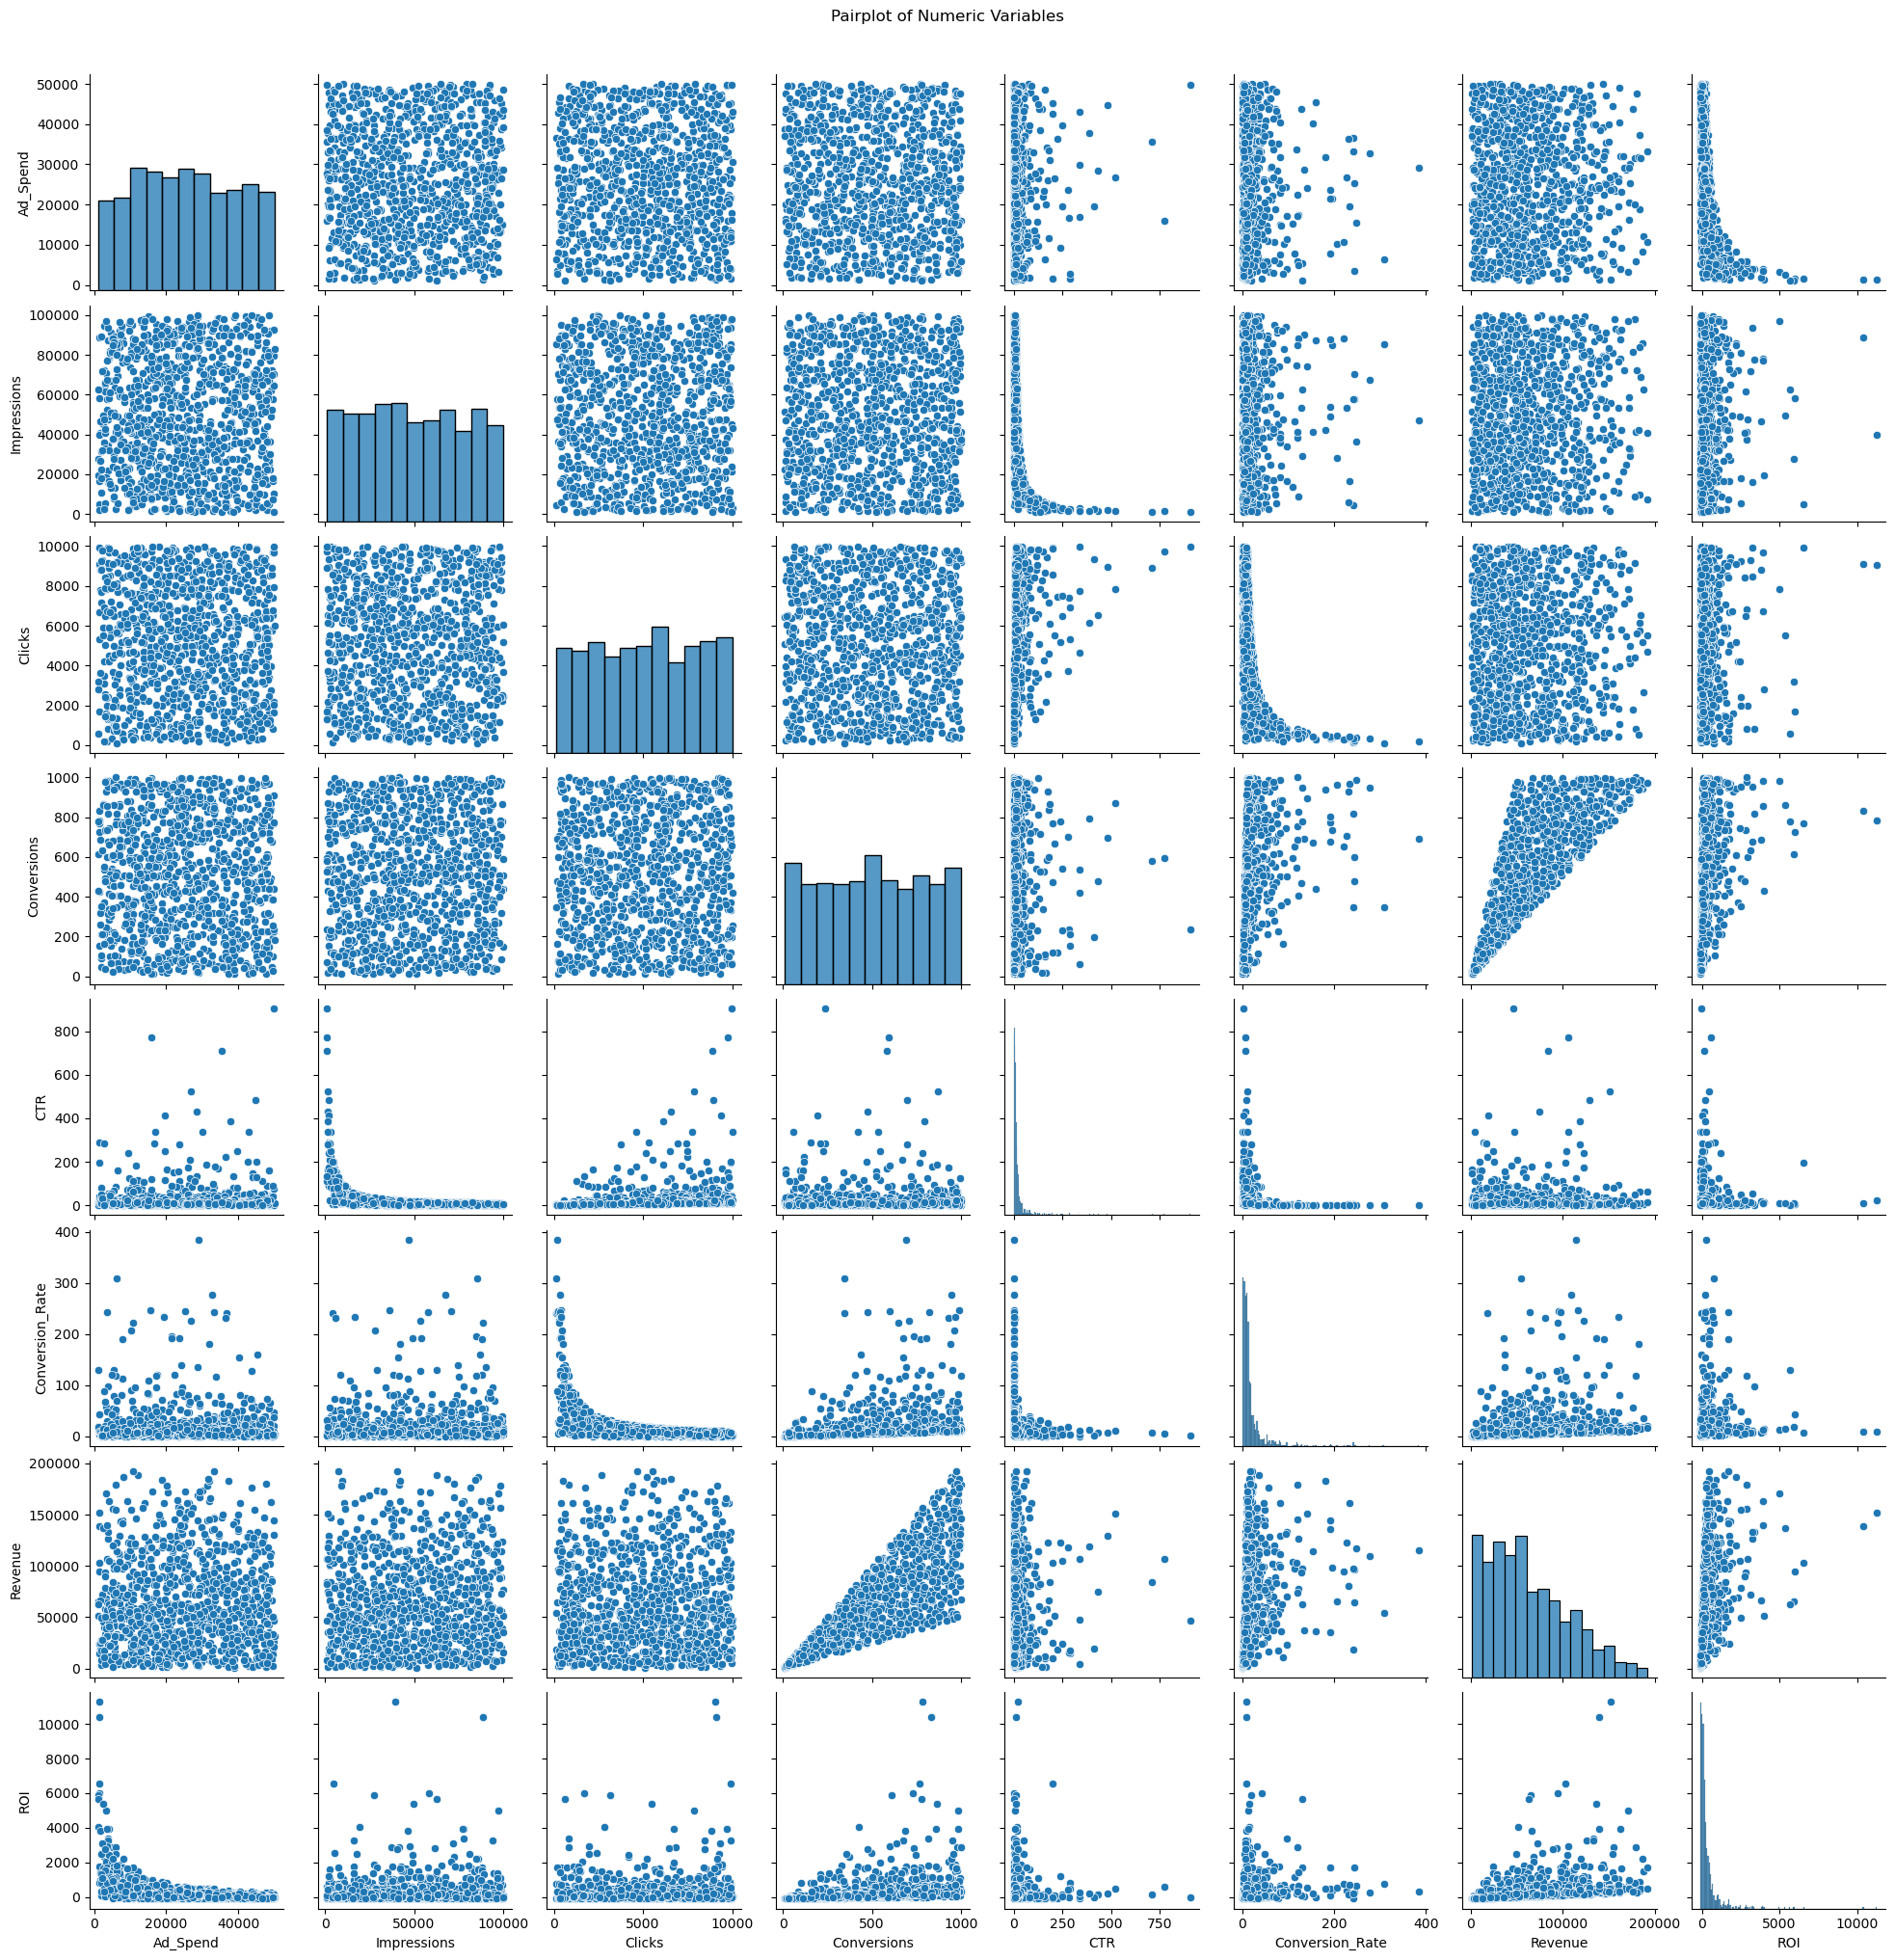

In [29]:
# List of numeric columns to visualize
numeric_columns = ['Ad_Spend', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate', 'Revenue', 'ROI']

# Create a pair plot
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()


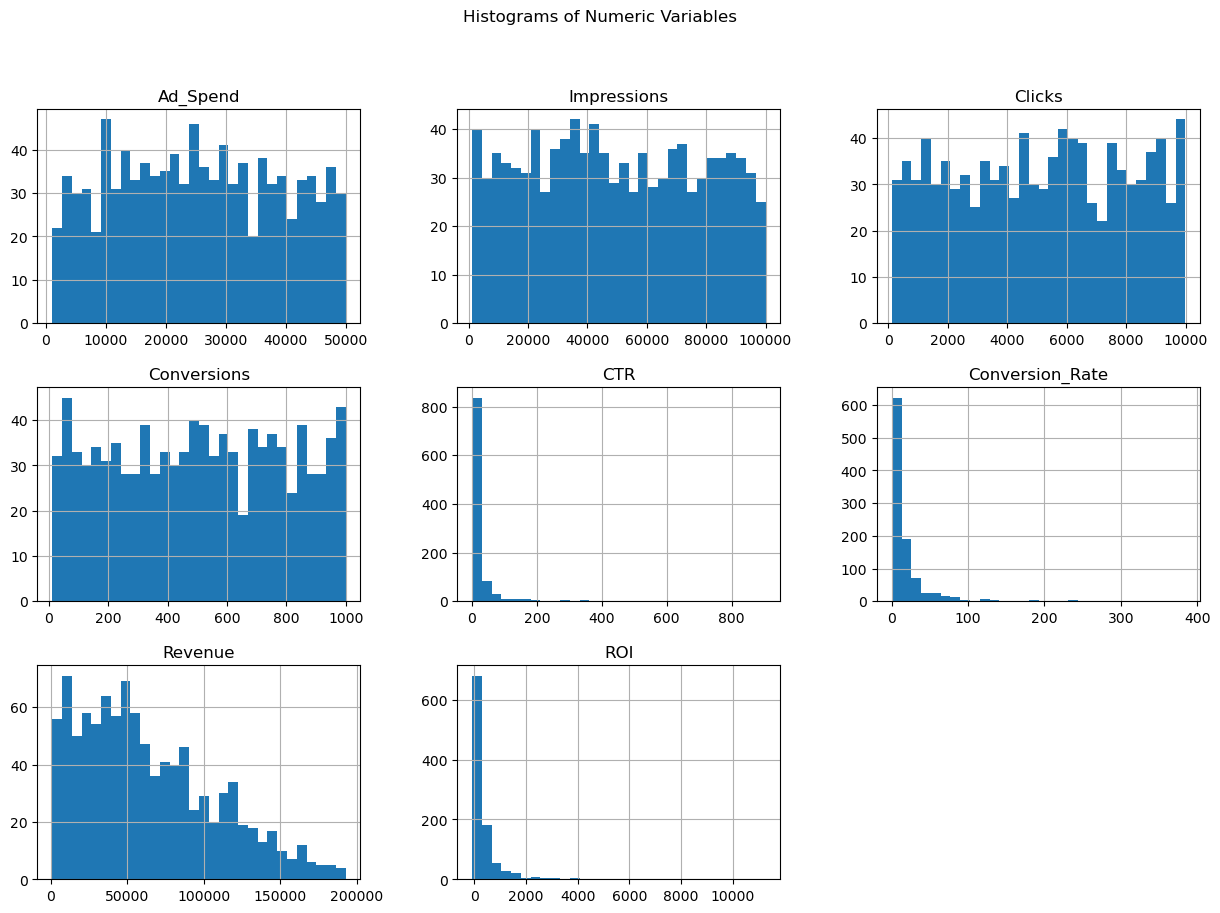

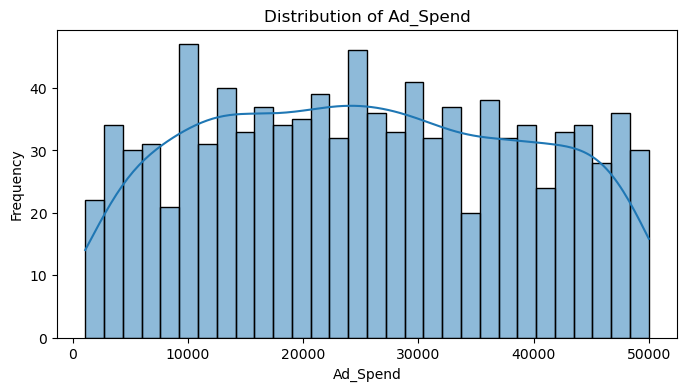

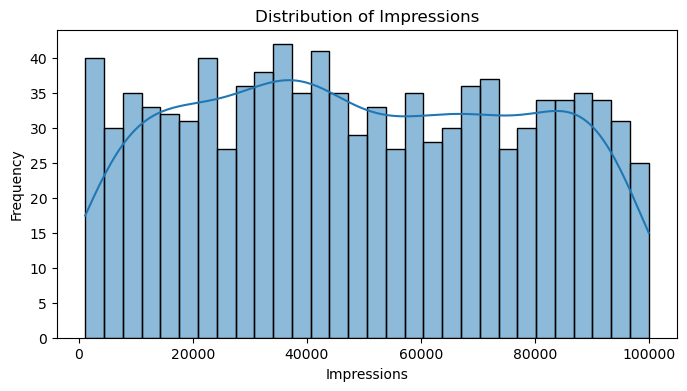

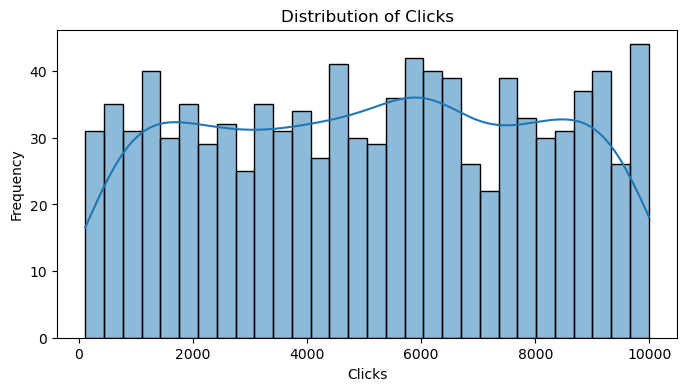

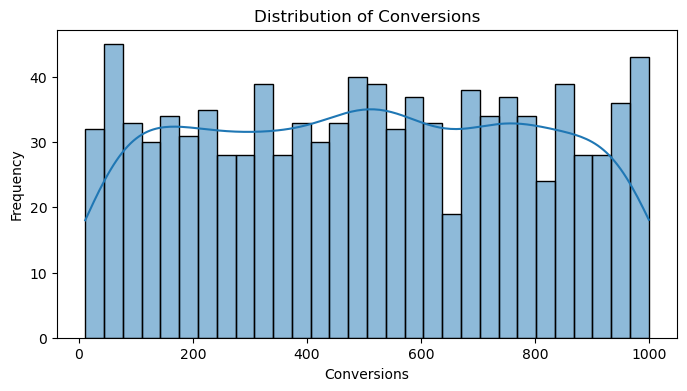

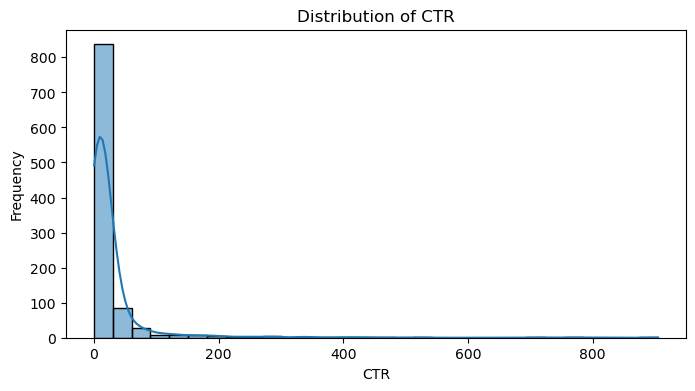

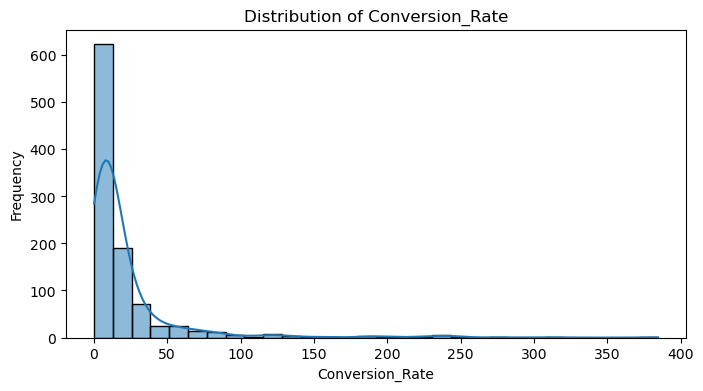

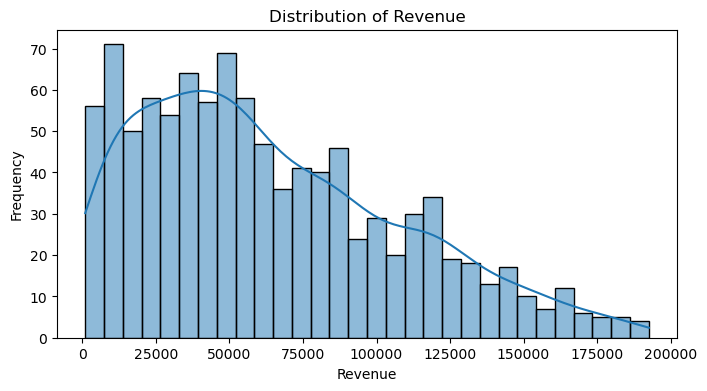

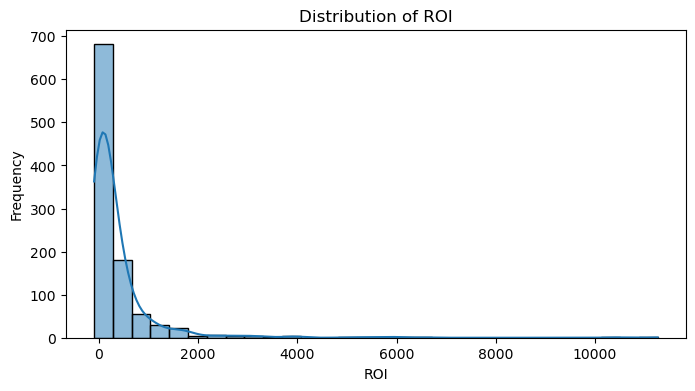

In [30]:
# Create histograms for each numeric column
df[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# Alternatively, use seaborn's displot (one at a time) with KDE overlay for a prettier look:
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


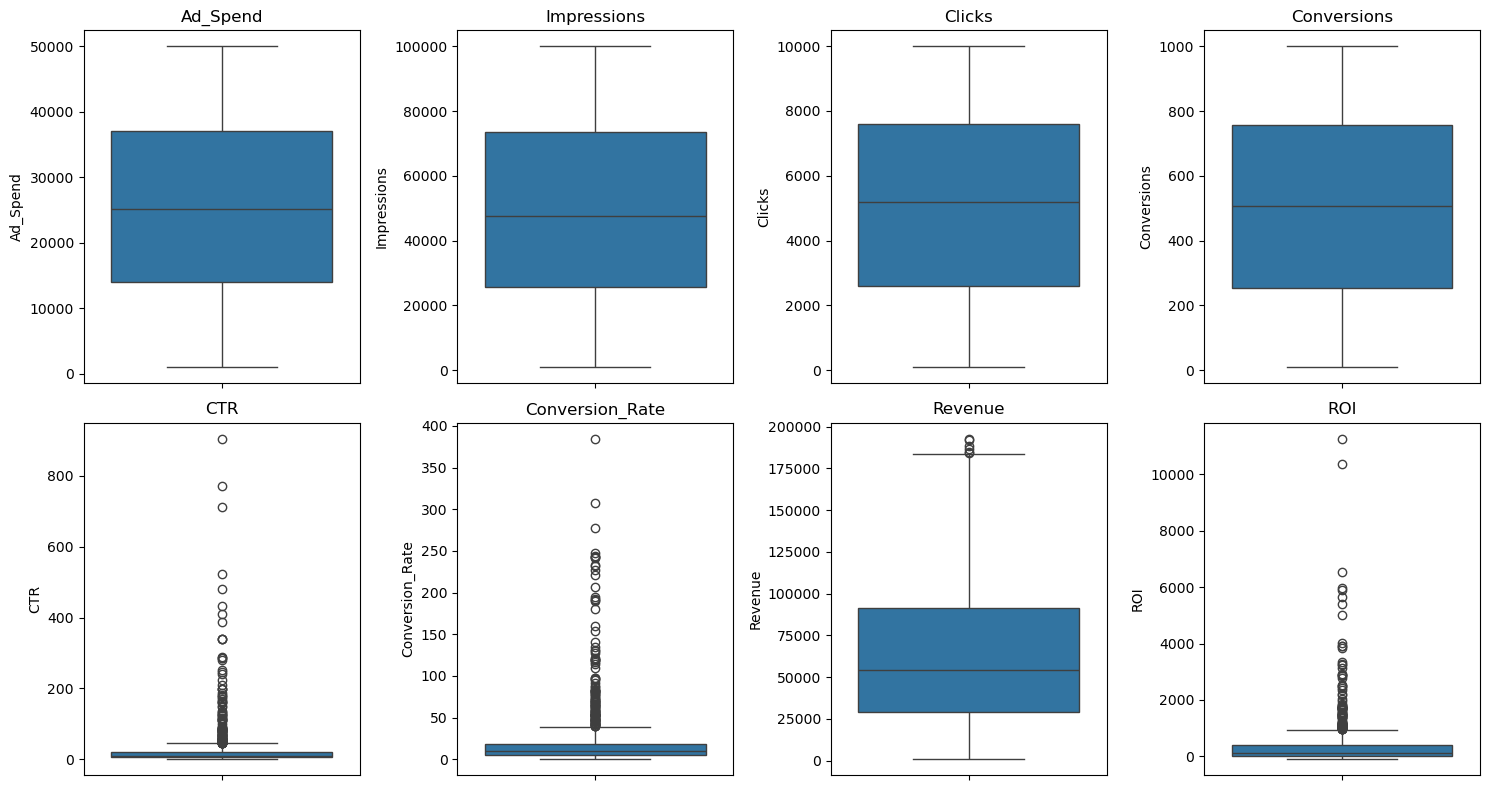

In [31]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)  # Arrange subplots in a 2x4 grid
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


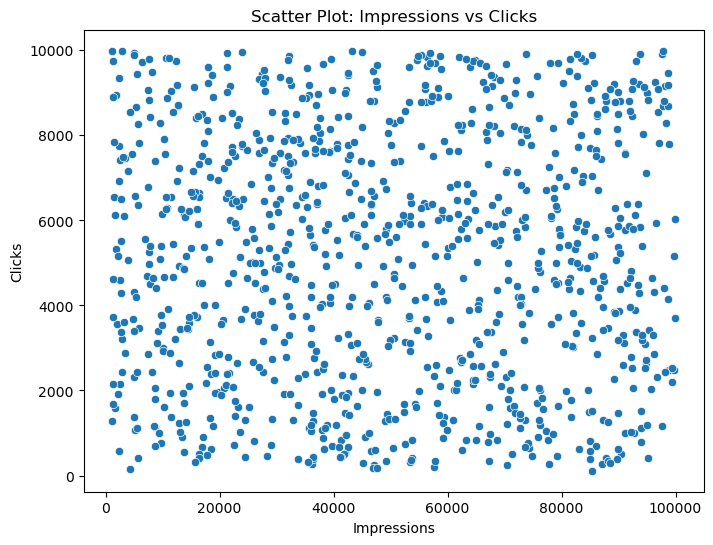

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Impressions', y='Clicks', data=df)
plt.title("Scatter Plot: Impressions vs Clicks")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.show()


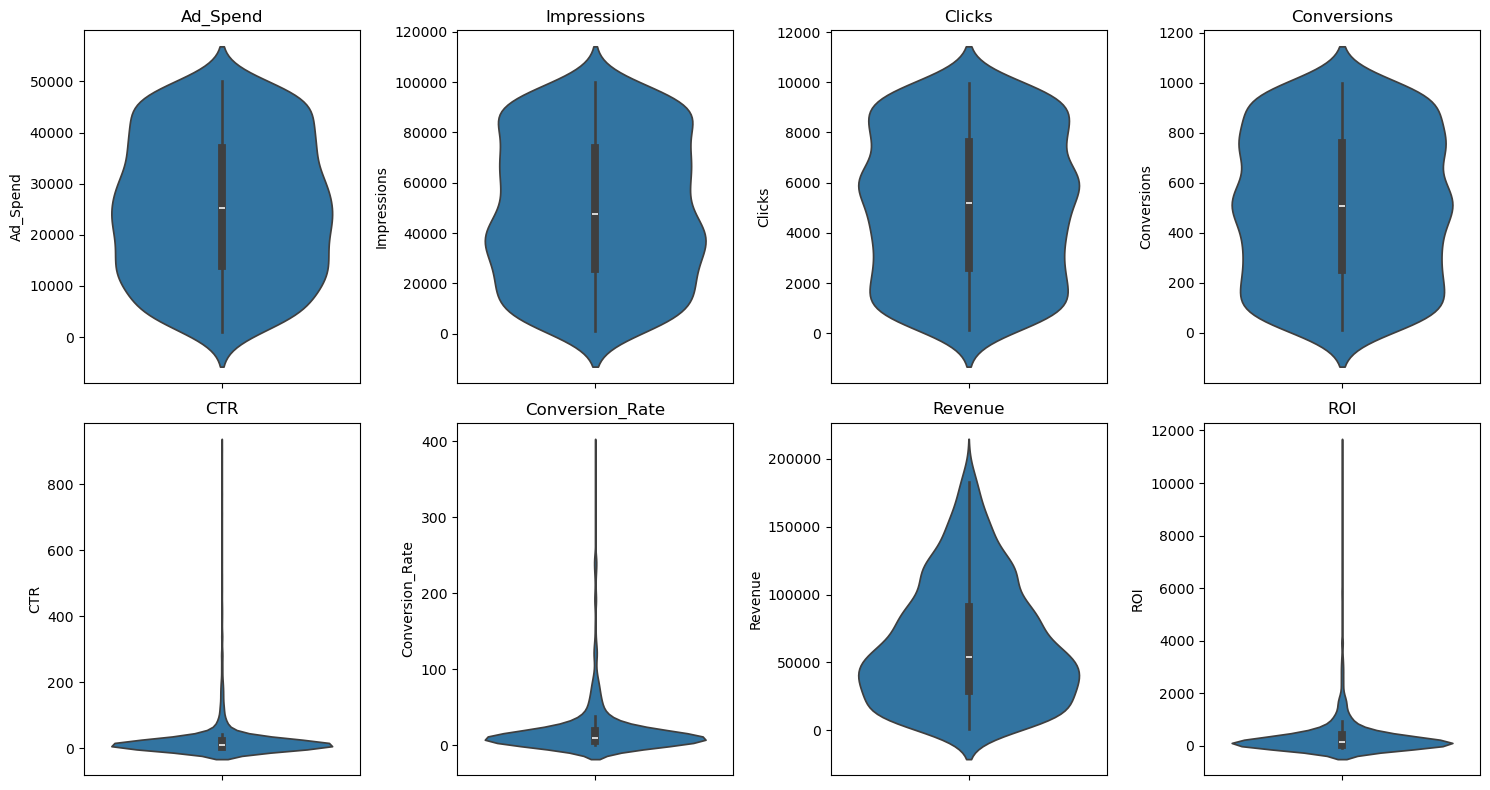

In [35]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


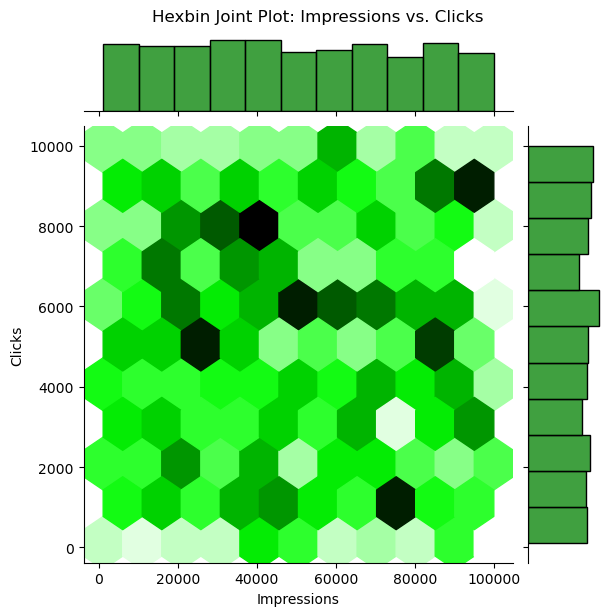

In [37]:
sns.jointplot(x='Impressions', y='Clicks', data=df, kind='hex', color='green')
plt.suptitle("Hexbin Joint Plot: Impressions vs. Clicks", y=1.02)
plt.show()


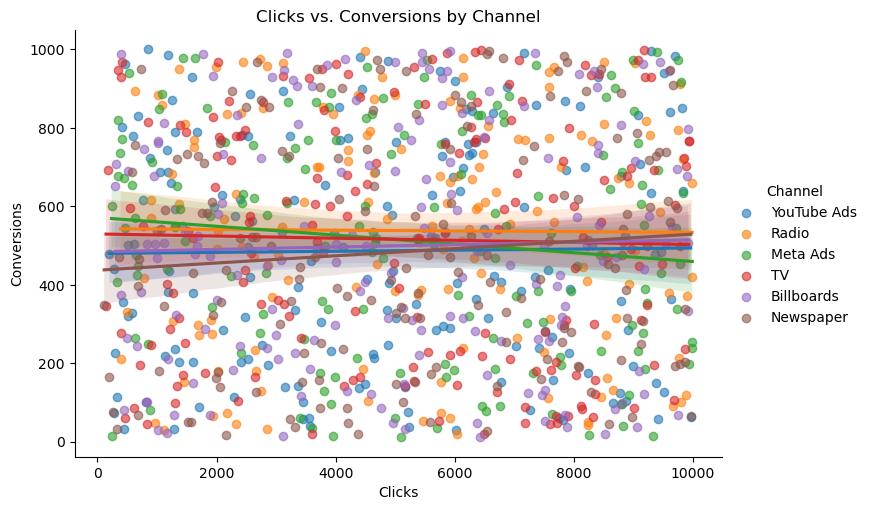

In [38]:
sns.lmplot(x='Clicks', y='Conversions', hue='Channel', data=df, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title("Clicks vs. Conversions by Channel")
plt.xlabel("Clicks")
plt.ylabel("Conversions")
plt.show()


C:\Users\Work\AppData\Local\Temp\ipykernel_20056\3715285159.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='CTR', y='Conversion_Rate', data=df, cmap="Blues", shade=True, thresh=0.05)


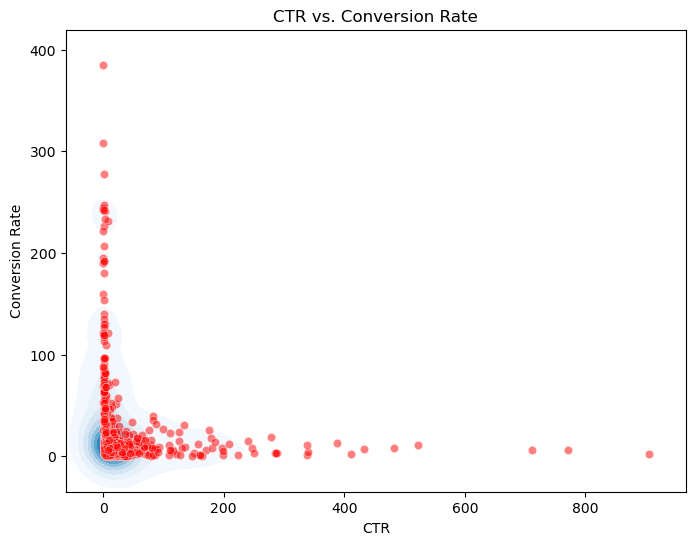

In [39]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='CTR', y='Conversion_Rate', data=df, cmap="Blues", shade=True, thresh=0.05)
sns.scatterplot(x='CTR', y='Conversion_Rate', data=df, color='red', alpha=0.5)
plt.title("CTR vs. Conversion Rate")
plt.xlabel("CTR")
plt.ylabel("Conversion Rate")
plt.show()


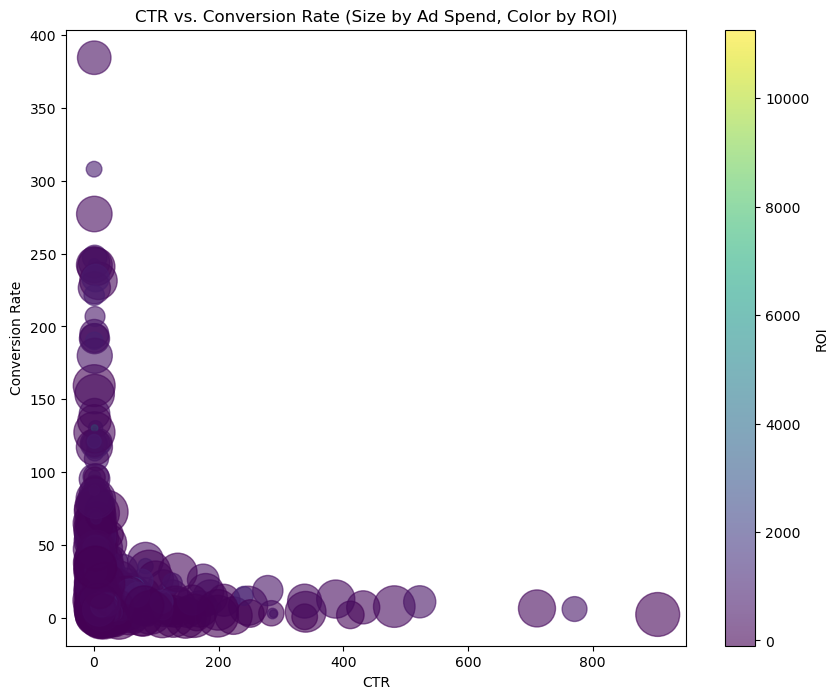

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['CTR'], y=df['Conversion_Rate'], 
            s=df['Ad_Spend'] / 50,  # Adjust the divisor to scale the sizes appropriately
            c=df['ROI'], cmap='viridis', alpha=0.6)
plt.colorbar(label='ROI')
plt.xlabel('CTR')
plt.ylabel('Conversion Rate')
plt.title('CTR vs. Conversion Rate (Size by Ad Spend, Color by ROI)')
plt.show()


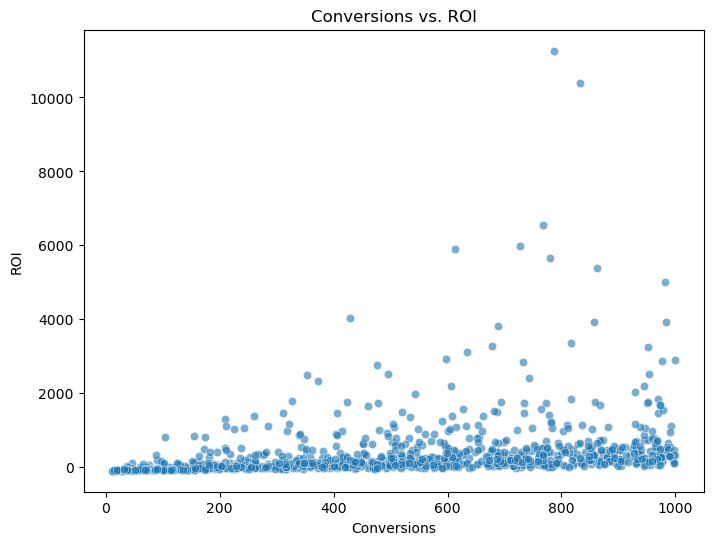

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Conversions', y='ROI', data=df, alpha=0.6)
plt.title("Conversions vs. ROI")
plt.xlabel("Conversions")
plt.ylabel("ROI")
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assume df is already cleaned and numeric for the necessary columns.
# Define features and target variable
features = ['Ad_Spend', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate', 'Revenue']
target = 'ROI'

X = df[features]
y = df[target]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Linear Regression Model Evaluation:
Mean Squared Error: 417223.41937500075
R^2 Score: 0.3486068679340777


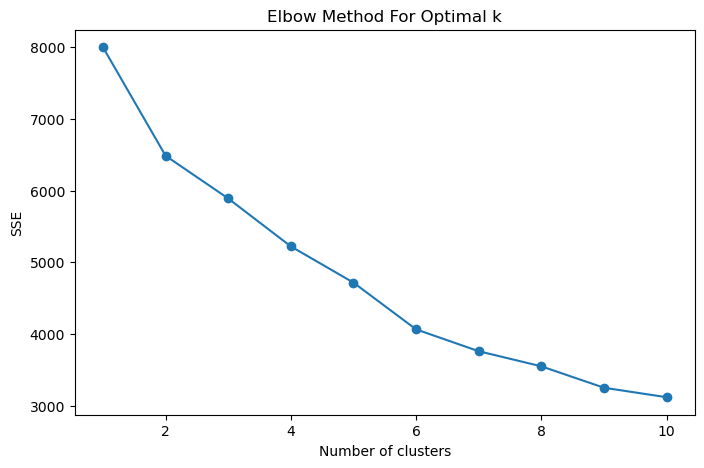

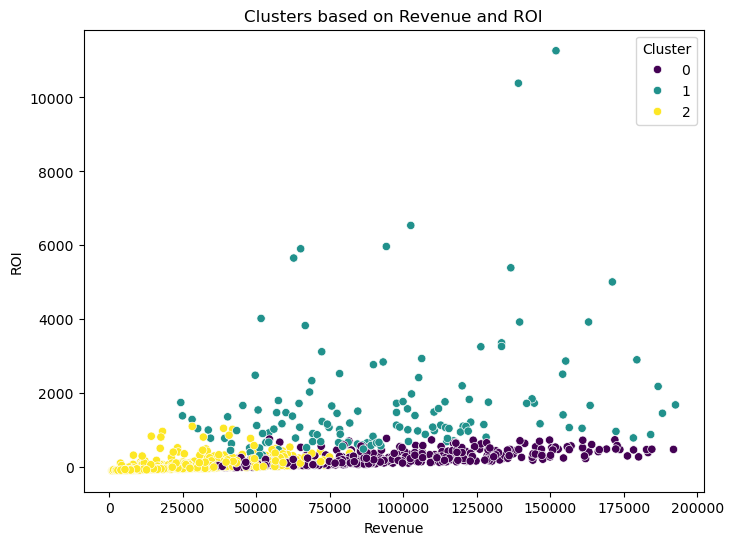

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to use for clustering
clustering_features = ['Ad_Spend', 'Impressions', 'Clicks', 'Conversions', 'CTR', 'Conversion_Rate', 'Revenue', 'ROI']
X_cluster = df[clustering_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Use the elbow method to determine the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# From the elbow plot, choose an optimal number of clusters (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for example, using a scatter plot for ROI vs Revenue)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Revenue', y='ROI', hue='Cluster', data=df, palette='viridis')
plt.title("Clusters based on Revenue and ROI")
plt.xlabel("Revenue")
plt.ylabel("ROI")
plt.show()


In [45]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a binary target variable based on the median ROI
median_roi = df['ROI'].median()
df['High_ROI'] = np.where(df['ROI'] > median_roi, 1, 0)

# Define features (you can use the same features as before)
X_class = df[features]  # features defined in the regression example
y_class = df['High_ROI']

# Split into training and testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_cls, y_train_cls)

# Make predictions and evaluate
y_pred_cls = clf.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)

print("Classification Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))


Classification Model Evaluation:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[100   0]
 [  0 100]]


Feature Importances:
           Feature  Importance
0         Ad_Spend    0.678929
6          Revenue    0.254181
3      Conversions    0.032169
1      Impressions    0.013843
2           Clicks    0.008619
4              CTR    0.006274
5  Conversion_Rate    0.005985


C:\Users\Work\AppData\Local\Temp\ipykernel_20056\2077897703.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


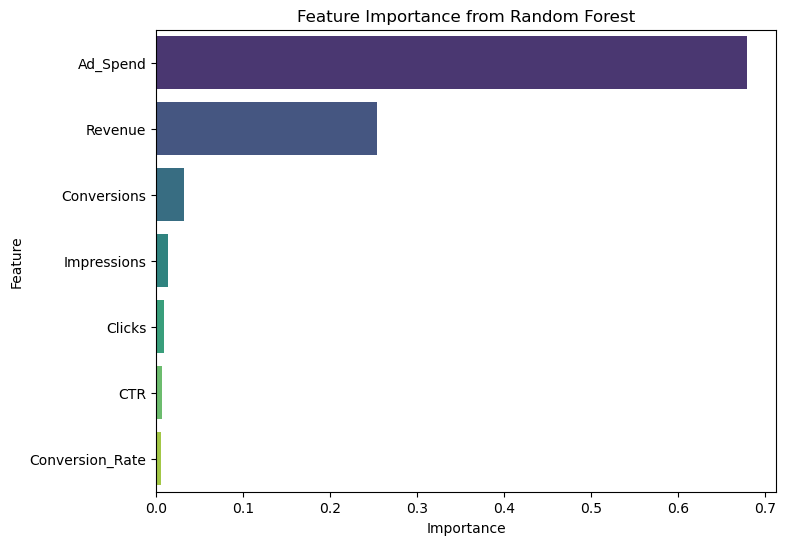

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Using the same features and target (e.g., ROI)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.show()
